In [5]:
!pip install streamlit yfinance fbprophet mplfinance numpy pandas

In [6]:
import streamlit as st
import yfinance as yf
from fbprophet import Prophet
import mplfinance as mpf
import numpy as np
import pandas as pd

# Define the app
def app():
    # Set the app title
    st.set_page_config(page_title='Stock Price Prediction App')

    # Define the app header
    st.write('# Stock Price Prediction App')

    # Define the stock selection input
    stock_name = st.text_input('Enter a stock symbol (e.g. AAPL)', 'AAPL')

    # Define the time range input
    time_range = st.selectbox('Select a time range',
                              ['1mo', '3mo', '6mo', '1y', '2y', '5y'])

    # Get the stock data from Yahoo Finance
    stock_data = yf.download(stock_name, period=time_range)

    # Define the Prophet model
    model = Prophet(daily_seasonality=True)

    # Prepare the data for Prophet
    df = pd.DataFrame(stock_data['Adj Close'])
    df.reset_index(inplace=True)
    df.columns = ['ds', 'y']

    # Fit the Prophet model to the data
    model.fit(df)

    # Define the future time range for the Prophet forecast
    future = model.make_future_dataframe(periods=365)

    # Generate the Prophet forecast
    forecast = model.predict(future)

    # Define the Pivot Point levels
    high = np.max(stock_data['High'])
    low = np.min(stock_data['Low'])
    close = stock_data['Adj Close'][-1]
    pivot = (high + low + close) / 3
    support1 = (2 * pivot) - high
    support2 = pivot - (high - low)
    resistance1 = (2 * pivot) - low
    resistance2 = pivot + (high - low)

    # Define the plot of the stock price with Pivot Points
    plot_data = stock_data.copy()
    plot_data['Pivot'] = pivot
    plot_data['S1'] = support1
    plot_data['S2'] = support2
    plot_data['R1'] = resistance1
    plot_data['R2'] = resistance2
    plot_data.index.name = 'Date'
    mpf.plot(plot_data, type='candle', style='charles', mav=(10, 20),
             title=f'{stock_name} ({time_range}) with Pivot Points',
             ylabel='Price ($)', ylabel_lower='Shares\nTraded')
    
    # Define the plot of the Prophet forecast
    fig = model.plot(forecast)
    st.pyplot(fig)


2023-03-07 14:29:54.846 
  command:

    streamlit run C:\Users\Rashid Alshehhi\anaconda3\envs\RashidEnv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2023-03-07 14:29:55.830 Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-03-07 14:29:55.830 NumExpr defaulting to 8 threads.


[*********************100%***********************]  1 of 1 completed


2023-03-07 14:29:57.021 Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-03-07 14:29:57.044 n_changepoints greater than number of observations. Using 14.


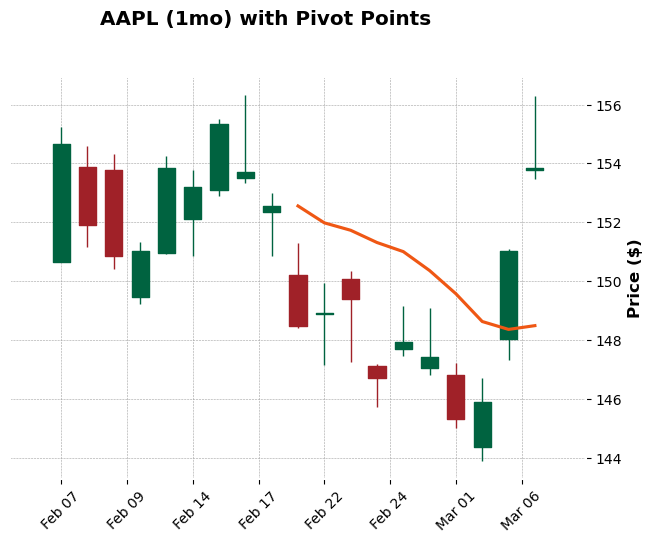

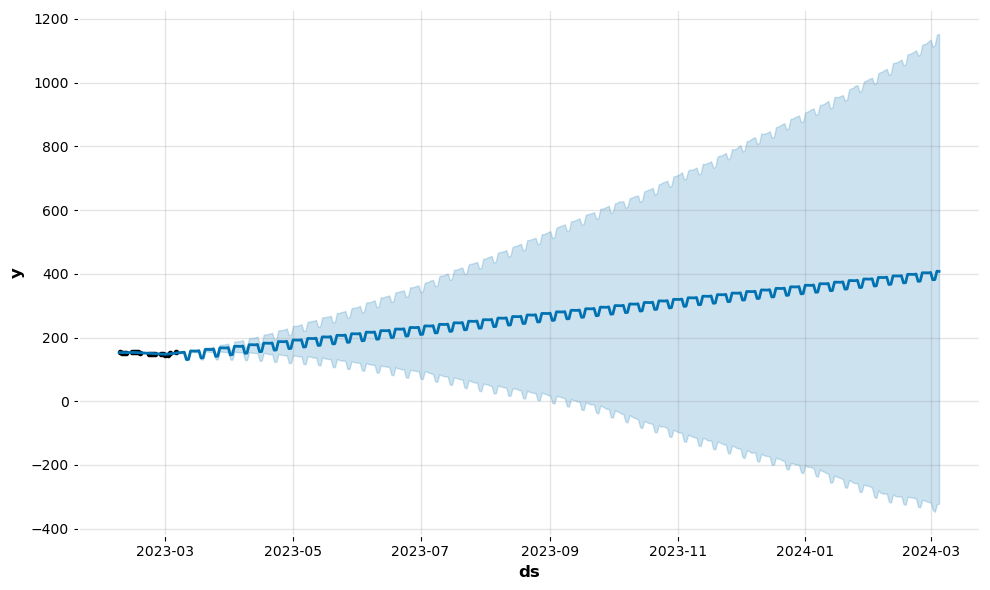

In [7]:
app()
